# Analyse line loop data

plot, for each mouse, the fraction of the time that they are following the light

In [2]:
%matplotlib inline
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn
import scipy.stats as stt
from statsmodels.stats import proportion
seaborn.set(font_scale=1.75,style='ticks')
import os
import re
import sys
import itertools
import networkx as nx
sys.path.append("/Users/yves/Documents/Code/")
sys.path.append("/Users/yves/Documents/Code/structural_knowledge/packages/")

In [3]:
import mouse_poker as mpk
import yutils

# Defined functions 

In [4]:
poke_pos = [  [149,0],
         [68,19],[231,19],
       [0,62],[149,62],[298,62],
         [68,105],[231,105],
              [149,124]]

In [5]:
#edges = list(set([(i[1][0],i[1][1]) for i in dat_dict['port'] if None not in i[1]]))

# Actual code to run stuff 

In [101]:
ROOT = "/Users/Yves/Documents/behavior_data/line_loop_cohort_1/"
#ROOT = "/Users/Yves/Documents/behavior_data/line_loop_cohort_2/"
#all_df  = mpk.load.create_base_df(ROOT,rerun=True)
all_df = mpk.load.load_df(ROOT)

In [102]:
all_df = mpk.load.load_df(ROOT)
#good_df = all_df.loc[all_df['valid']]
good_df = all_df.loc[all_df['nRews']>20]

In [103]:
uniq_days = sorted(np.unique(good_df['date']))

In [104]:
uniq_days

[numpy.datetime64('2020-01-30T00:00:00.000000000'),
 numpy.datetime64('2020-01-31T00:00:00.000000000'),
 numpy.datetime64('2020-02-01T00:00:00.000000000'),
 numpy.datetime64('2020-02-02T00:00:00.000000000'),
 numpy.datetime64('2020-02-03T00:00:00.000000000'),
 numpy.datetime64('2020-02-04T00:00:00.000000000'),
 numpy.datetime64('2020-02-05T00:00:00.000000000'),
 numpy.datetime64('2020-02-06T00:00:00.000000000'),
 numpy.datetime64('2020-02-07T00:00:00.000000000'),
 numpy.datetime64('2020-02-08T00:00:00.000000000'),
 numpy.datetime64('2020-02-10T00:00:00.000000000'),
 numpy.datetime64('2020-02-11T00:00:00.000000000'),
 numpy.datetime64('2020-02-12T00:00:00.000000000'),
 numpy.datetime64('2020-02-13T00:00:00.000000000'),
 numpy.datetime64('2020-02-14T00:00:00.000000000'),
 numpy.datetime64('2020-02-15T00:00:00.000000000'),
 numpy.datetime64('2020-02-17T00:00:00.000000000'),
 numpy.datetime64('2020-02-20T00:00:00.000000000'),
 numpy.datetime64('2020-02-21T00:00:00.000000000'),
 numpy.datet

In [105]:
day_df0 = good_df.loc[good_df['date']=='2020-02-26']

day_df = good_df.loc[good_df['date']=='2020-02-29']


In [106]:
len(day_df)

36

In [107]:
fL0_1 = []
fL1_1 = []

fL0_2 = []
fL1_2 = []

done = []
for _,d in day_df0.iterrows():
    
    if [d['mouse_ID'],d['task_nr']] not in done:
        frac = d['summary_dict']['lit_pokes']/(d['summary_dict']['lit_pokes']+d['summary_dict']['dark_pokes']+1)
        if '2' in d['group']:
            fL0_2.append(frac)
        elif '1' in d['group']:
            fL0_1.append(frac)

        done.append([d['mouse_ID'],d['task_nr']])

        
done = []
for _,d in day_df.iterrows():
    
    
    if [d['mouse_ID'],d['task_nr']] not in done:

        frac = d['summary_dict']['lit_pokes']/(d['summary_dict']['lit_pokes']+d['summary_dict']['dark_pokes']+1)
        if '2' in d['group']:
            fL1_2.append(frac)
        elif '1' in d['group']:
            fL1_1.append(frac)

        done.append([d['mouse_ID'],d['task_nr']])


In [108]:
np.mean(fL1_1)

0.46176018530758955

In [109]:
np.mean(fL1_2)

0.49857516960007725

In [110]:
np.mean(np.array(fL1_1) - np.array(fL0_1))

0.015718852016440563

In [111]:
np.mean(np.array(fL1_2) - np.array(fL0_2))

0.003269560626515016

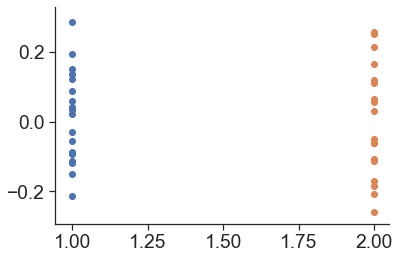

In [112]:
plt.scatter([1]*18,np.array(fL1_1) - np.array(fL0_1))

plt.scatter([2]*18,np.array(fL1_2) - np.array(fL0_2))

seaborn.despine()

In [113]:
uniq_days

[numpy.datetime64('2020-01-30T00:00:00.000000000'),
 numpy.datetime64('2020-01-31T00:00:00.000000000'),
 numpy.datetime64('2020-02-01T00:00:00.000000000'),
 numpy.datetime64('2020-02-02T00:00:00.000000000'),
 numpy.datetime64('2020-02-03T00:00:00.000000000'),
 numpy.datetime64('2020-02-04T00:00:00.000000000'),
 numpy.datetime64('2020-02-05T00:00:00.000000000'),
 numpy.datetime64('2020-02-06T00:00:00.000000000'),
 numpy.datetime64('2020-02-07T00:00:00.000000000'),
 numpy.datetime64('2020-02-08T00:00:00.000000000'),
 numpy.datetime64('2020-02-10T00:00:00.000000000'),
 numpy.datetime64('2020-02-11T00:00:00.000000000'),
 numpy.datetime64('2020-02-12T00:00:00.000000000'),
 numpy.datetime64('2020-02-13T00:00:00.000000000'),
 numpy.datetime64('2020-02-14T00:00:00.000000000'),
 numpy.datetime64('2020-02-15T00:00:00.000000000'),
 numpy.datetime64('2020-02-17T00:00:00.000000000'),
 numpy.datetime64('2020-02-20T00:00:00.000000000'),
 numpy.datetime64('2020-02-21T00:00:00.000000000'),
 numpy.datet

In [114]:
frac_lit_pokes = []

df_frac_lit = pd.DataFrame(columns=['mouse','date','mu','max','layout','structure','time','task_nr'])

for day in uniq_days:
    
    day_df = good_df.loc[good_df['date']==day]
    #print(len(day_df))
    
    if 1:#'forced' in day_df['task_name'].values[0]:
        tmp = []
        for m in np.unique(day_df['mouse_ID'].values):
            #print(1)
            for _,d in day_df.loc[day_df['mouse_ID']==m].iterrows():
                #print(d)
                if 'lit_pokes' in d['summary_dict'].keys():
                    fpath = d['filepath']
                    #frac = d['summary_dict']['lit_pokes']/(d['summary_dict']['lit_pokes']+d['summary_dict']['dark_pokes']+1)
                    #frac2 = np.max([float(re.findall('fracL(0\.[0-9]*)_',i)[0]) for i in open(fpath,'r').readlines() if re.findall('fracL(0\.[0-9]*)_',i)][50:])
                    try:
                        #frac = np.max([float(re.findall('fracL(0\.[0-9]*)_',i)[0]) for i in open(fpath,'r').readlines() if re.findall('fracL(0\.[0-9]*)_',i)][50:])
                        frac2 = d['summary_dict']['lit_pokes']/(d['summary_dict']['lit_pokes']+d['summary_dict']['dark_pokes']+1)
                        frac = np.max([float(re.findall('fracL(0\.[0-9]*)_',i)[0]) for i in open(fpath,'r').readlines() if re.findall('fracL(0\.[0-9]*)_',i)][20:])

                        dct = {'mouse': m,
                               'date': day,
                               'mu': frac2,
                               'max': frac,
                               'layout': d['layout'],
                               'structure': d['structure'],
                               'time': d['time'],
                               'task_nr': d['task_nr']}
                        df_frac_lit.loc[len(df_frac_lit)+1] = dct
                        tmp.append(frac)
                    except ValueError:
                        print("WARNING")
                        pass
                        
        frac_lit_pokes.append(tmp)

WARNING


In [115]:
np.nanmean(df_frac_lit.loc[df_frac_lit['task_nr']==1]['max'])

0.5143698723333333

In [116]:
np.nanmean(df_frac_lit.loc[df_frac_lit['task_nr']==2]['max'])

0.46774408779661014

In [117]:
task_1_mu = []
task_2_mu = []
for m in np.unique(df_frac_lit['mouse']):
    
    mdf = df_frac_lit.loc[(df_frac_lit['mouse']==m) & (df_frac_lit['date']>df_frac_lit['date'].values[0])]
    task_1_mu.append(np.nanmean(mdf.loc[mdf['task_nr']==1]['mu']))
    task_2_mu.append(np.nanmean(mdf.loc[mdf['task_nr']==2]['mu']))

In [118]:
cc,pval = yutils.stat.cc_pval(task_1_mu,task_2_mu)

In [119]:
pval

90.54

Text(13.875, 0.5, 'Performance on task 2')

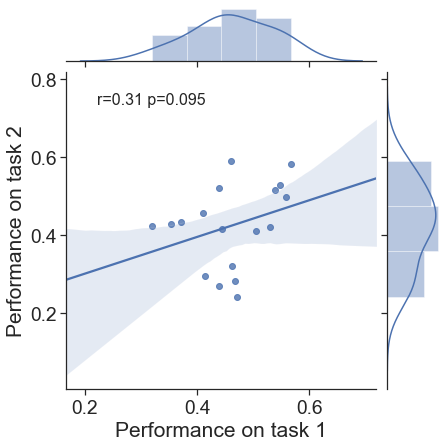

In [120]:
seaborn.jointplot(task_1_mu,task_2_mu,kind='reg')
plt.gca().annotate("r={:.2f} p={:.3f}".format(cc,(100-pval)/100),[.1,.9],xycoords='axes fraction',fontsize=16)
plt.xlabel("Performance on task 1")
plt.ylabel("Performance on task 2")

In [121]:
len(df_frac_lit.loc[df_frac_lit['task_nr']==2]['max'])

590

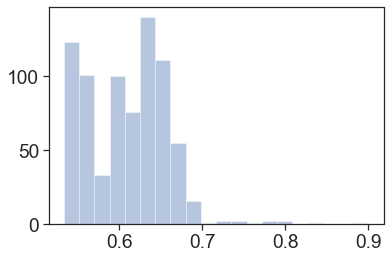

In [122]:
seaborn.distplot([float(re.findall('fracL(0\.[0-9]*)_',i)[0]) for i in open(fpath,'r').readlines() if re.findall('fracL(0\.[0-9]*)_',i)],kde=0)

In [123]:
#plt.plot([float(re.findall('fracL(0\.[0-9]*)_',i)[0]) for i in open(fpath,'r').readlines() if re.findall('fracL(0\.[0-9]*)_',i)])

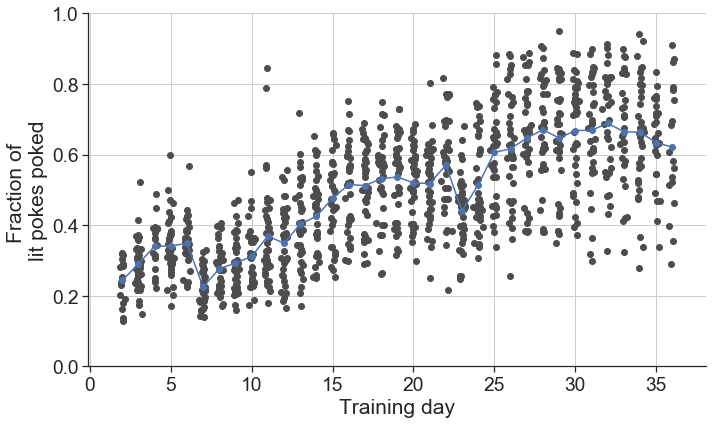

In [124]:
plt.figure(figsize=(10,6))
plt.plot([np.mean(i) for i in frac_lit_pokes],marker='o')
for ctr in range(len(frac_lit_pokes)):
    n_ = len(frac_lit_pokes[ctr])
    plt.scatter(ctr*np.ones(n_)+np.random.normal(scale=.1,size=n_),frac_lit_pokes[ctr],color='.3')
plt.xlabel("Training day")
plt.ylabel("Fraction of \nlit pokes poked")
plt.ylim(0,1)
seaborn.despine()
plt.grid()
plt.tight_layout()

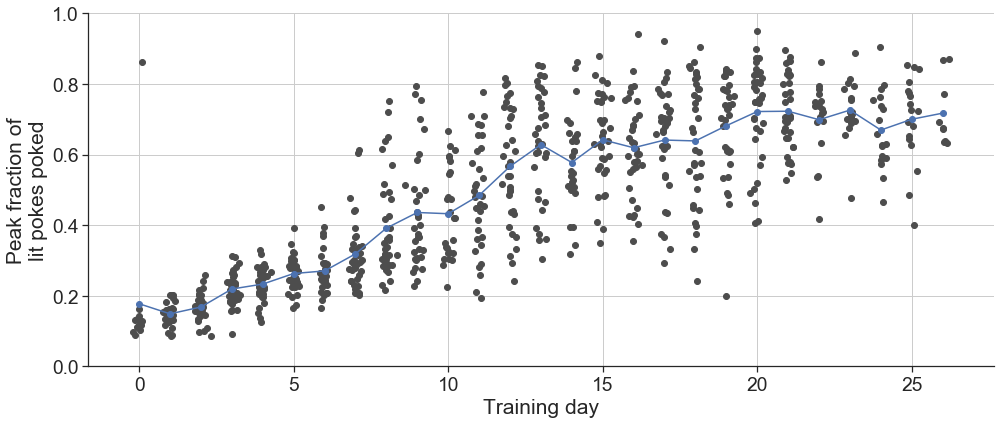

In [99]:
plt.figure(figsize=(14,6))
plt.plot([np.mean(i) for i in frac_lit_pokes],marker='o')
for ctr in range(len(frac_lit_pokes)):
    n_ = len(frac_lit_pokes[ctr])
    plt.scatter(ctr*np.ones(n_)+np.random.normal(scale=.1,size=n_),frac_lit_pokes[ctr],color='.3')
plt.xlabel("Training day")
plt.ylabel(" Peak fraction of \nlit pokes poked")
plt.ylim(0,1)
seaborn.despine()
plt.grid()
plt.tight_layout()

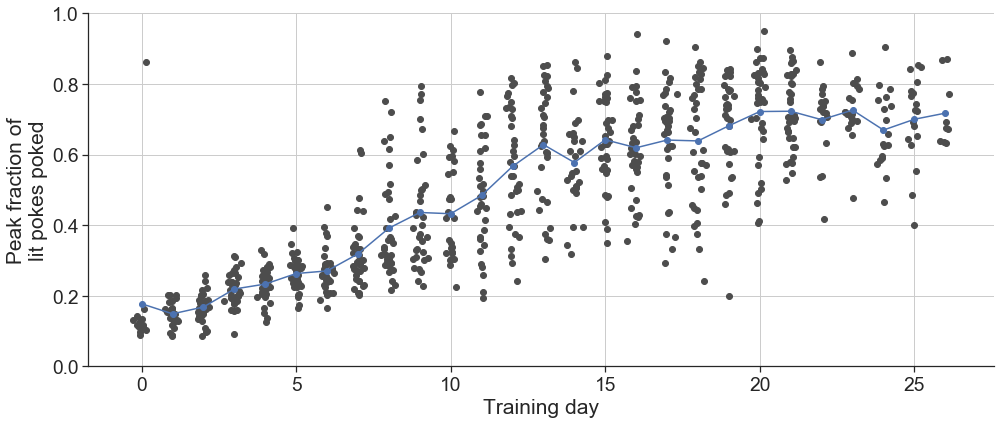

In [100]:
plt.figure(figsize=(14,6))
plt.plot([np.mean(i) for i in frac_lit_pokes],marker='o')
for ctr in range(len(frac_lit_pokes)):
    n_ = len(frac_lit_pokes[ctr])
    plt.scatter(ctr*np.ones(n_)+np.random.normal(scale=.1,size=n_),frac_lit_pokes[ctr],color='.3')
plt.xlabel("Training day")
plt.ylabel(" Peak fraction of \nlit pokes poked")
plt.ylim(0,1)
seaborn.despine()
plt.grid()
plt.tight_layout()

In [123]:
        for fpath in day_df['filepath'].values:
            f = open(fpath,'r')

            lines = f.readlines()
            dat_dict,events,event_times,nRews = mpk.load.parse_data(lines,None)

            
            d1 = day_df.loc[day_df['filepath']==fpath].summary_dict.values[0]['dark_pokes']
            d2 = day_df.loc[day_df['filepath']==fpath].summary_dict.values[0]['lit_pokes']
            
            print(len(dat_dict['port'])/(len([i for i in events if re.findall(r'_[0-9]$',i)])-len(dat_dict['port'])),d2/(d1+d2))

0.7740652346857597 0.6644085461177697
0.8187725631768953 0.6876574307304786
0.8051323175621492 0.730581205866377
0.5145929339477726 0.5122422680412371
0.7986030267753201 0.694585448392555
1.0770171149144254 0.7187039764359352
0.5941176470588235 0.455005055611729
0.5876288659793815 0.4752981260647359
1.206282722513089 0.7801771871539314
0.4103690685413005 0.4385577630610743
0.6581673306772908 0.6182926829268293
0.44045368620037806 0.4891961970613656
0.47291666666666665 0.4607142857142857
0.6321022727272727 0.559432933478735
0.45646437994722955 0.484375
1.2346938775510203 0.8109719737626714
0.5775109170305677 0.5431993156544055
0.6887755102040817 0.6354088522130532
